In [16]:
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt

In [32]:
date_export = "2024-07-28"
date_export2 = date_export.replace("-", "")
data_file = join("extractions", f"bib_vdg_{date_export2}.csv.gz")

rbx_vdg = pd.read_csv(data_file)

FileNotFoundError: [Errno 2] No such file or directory: 'extractions\\bib_vdg_20240728.csv.gz'

In [18]:
rbx_vdg

,record_id,alignement_bnf,rbx_date_creation_notice,rbx_vdg_action,rbx_vdg_date,rbx_support,agence_cat,pat
0,1,True,2014-06-30,notice bibliographique et autorités,20240721.0,Livre,BnF,False
1,2,True,2014-06-30,notice bibliographique et autorités,20240721.0,Livre,BnF,False
2,3,True,2014-06-30,notice bibliographique et autorités,20240721.0,Livre,BnF,False
3,4,True,2014-06-30,notice bibliographique et autorités,20240721.0,Livre,BnF,False
4,6,True,2014-06-30,notice bibliographique et autorités,20240721.0,Livre,BnF,False
...,...,...,...,...,...,...,...,...
237616,368068,False,2024-07-27,notice bibliographique et autorités,20240728.0,Livre,Electre,False
237617,368070,True,2024-07-27,notice bibliographique et autorités,20240728.0,Livre,BnF,False
237618,368071,True,2024-07-27,notice bibliographique et autorités,20240728.0,Livre,BnF,False
237619,368072,True,2024-07-27,notice bibliographique et autorités,20240728.0,Livre,BnF,False


In [19]:
rbx_vdg_alignement_bnf = rbx_vdg.groupby('alignement_bnf')['record_id'].count().reset_index()
rbx_vdg_alignement_bnf.columns = ['alignement_bnf', 'nb_notices']
rbx_vdg_alignement_bnf['part'] = round(rbx_vdg_alignement_bnf['nb_notices'] / rbx_vdg_alignement_bnf['nb_notices'].sum(), 2)
rbx_vdg_alignement_bnf

,alignement_bnf,nb_notices,part
0,False,109791,0.46
1,True,127830,0.54


In [21]:
rbx_vdg_agence_cat = rbx_vdg.groupby('agence_cat')['record_id'].count().reset_index().sort_values(by='record_id', ascending=False)
rbx_vdg_agence_cat.columns = ['agence_cat', 'nb_notices']
rbx_vdg_agence_cat['part'] = round(rbx_vdg_agence_cat['nb_notices'] / rbx_vdg_agence_cat['nb_notices'].sum(), 2)
rbx_vdg_agence_cat

,agence_cat,nb_notices,part
1,BnF,116894,0.49
6,Médiathèque de Roubaix,95408,0.40
4,Electre,9091,0.04
3,COLACO,4469,0.02
2,CDMAIL,4394,0.02
5,GAM,3600,0.02
0,ADAV,2691,0.01
7,autre,1029,0.00


<Axes: xlabel='rbx_vdg_date'>

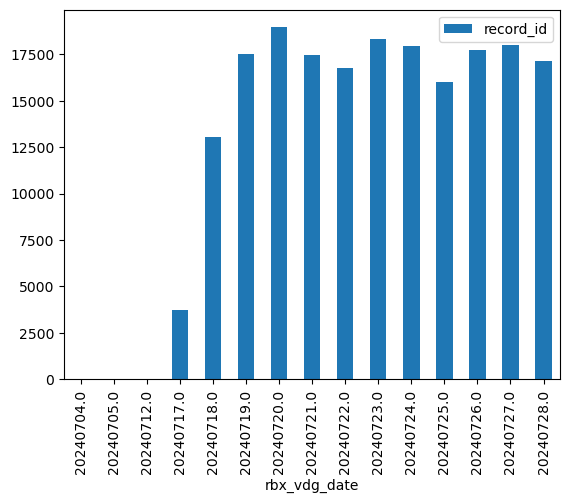

In [29]:
to_plot = rbx_vdg.groupby('rbx_vdg_date')['record_id'].count().reset_index().sort_values(by='rbx_vdg_date', ascending=False)[0:15]
to_plot.sort_values(by='rbx_vdg_date', ascending=True).plot.bar(x='rbx_vdg_date', y='record_id')

# Identification des problèmes (! à traiter d'abord dans suivi qualité)

## Absence d'action renseignée pour le vendangeur

In [31]:
no_action = rbx_vdg[rbx_vdg['rbx_vdg_action'].isna()]
no_action.to_excel("pb.xlsx", index=False)